# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
From running the code as it stands we discover a few things:
- The simulation does not terminate, and while there are some changes in terms of rewards the agent only appears to get both rewards and penalties connected to idling and they never arrive at the destination. This suggests that either the agent is stuck in a loop and committing the same mistakes over and over OR the agent is stationary and accumulating rewards and penalties by default (due to changing light signals). 
- The agent is state is not updating and it has not been enforced to meet a deadline
- Rewards for the agent are given for properly idling at red light
- When the light is red, the rewards are given to the agent, but when it changes from red to green, the rewards become penalties instead thus reducing the overall score to below zero  

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- The agent.py has several flags that can be set to affect the simulation:
    - **Learning**: will make sure that the agent uses Q-Learning i.e. that in every step,it will take its next step based on maximizing the likelihood of receiving the most rewards and/or minimizing penalties. So, this definite goal will change the simulation so that it accumulates more rewards.
    - **epsilon**: the random exploration flag dictates the level of stochasticity in the way in which the agent executes chosen actions. If epsilon is 1, the model is deterministic i.e. the agent will execute the chosen action with probability of 1 (all the time). Making it a deterministic model. However, if epsilon is between 0 and 1, the model becomes stochastic - the higher epsilon is, the more probable it is that the agent will execute the chosen action, but it will also "explore" other actions with probability (1-epsilon)
    - **alpha**: the learning rate determines the rate at which the agent learns the optimal policy when is is being trained (when the Learning flag is set to True). When alpha needs to be optimal, at just the right level. If it is too high, the model may not converge to the optimal policy (it will continue jumping from state-to-state without learning the optimal policy) and if alpha  is too low, it will take a long time converge and may even get stuck in a local optima instead of the global optima.
    
- In environment.py python file, the Environment class function that is cleed when an agenet performs an action is  -->  **self.env.act()** which takes the class and an chosen action as inputs. "env" is the class object name for environment in this case.
- In simulator.py The difference between render_text() vs. render() is:
    - **render.text()** prints the logged messages of the simulation to the terminal/command prompt while **render()** will print to the GUI if available. The former also contains more information than, and can be used to supplement the latter. 
- No, the **next_waypoint()** function in planner.py does NOT consider the North-West direction first before East-West. In fact it considers the East-West direction first

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


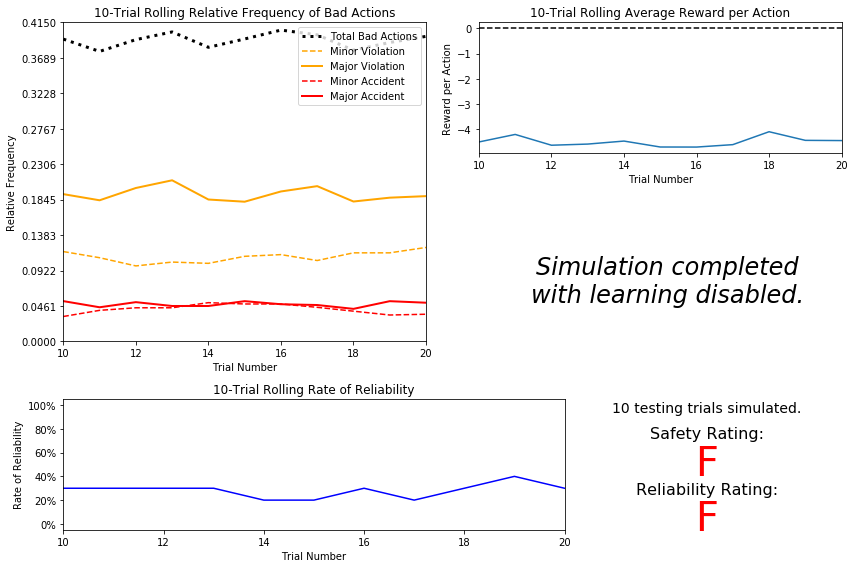

In [8]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- The driving agent is making bad decisions between 35 and 39% (~37%) of the time: ~9 % are accidents, generally split evenly between major (~4.5%) and minor (4.5%) accidents. Thus, about a quarter of the bad decisions lead to accidents ( one-eight major ones, and one eight minor ones). About half of the bad decisions (18%) are major violations and the remaining slightly less than a quarter of the bad decicions are minor violations.
- The rate of reliability is very low at around 20%, this makes sense given that the agent is moving randomly in the environment and not yet learning
- The agent is receiving negative rewards overall,i.e. a net of ~ -5 for each trial suggesting that it has been peanlized heavily for the bad decisions it was making. 
- However, the outcome of results does not change significantly even when the number of trials increases. It remains negative, but at similar levels even as the trials increase
- This Smartcab should be considered NOT safe and NOT reliable for its passengers given that it got an F rating for noth the Safety and the Reliability scores! These are the lowest scores given the grading metric above. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

Factors relevant for **both** safety and efficiency are : 
- **waypoint** is a very relevant an aspect of efficiency i.e. choosing the shortest or most direct route to the final destination so as to get there within the specified time.
- **light**: the color of the light tells the car to proceed or wait. This is relevant for safety because it prevents collisions and accidents. If the agent proceeds on a red light, it will commit a traffic violation and maybe even cause an accident.
- **left**: the car to the left may need to travel in a direction that intersects with the direction of the Smartcab, thus to avoid collision the agent must be aware of this so as not to cause an major or minor accident, making this input relevant for safety
- **oncoming**: oncoming traffic determines whether the agent can mark different turns or not. Thus awareness of direction of oncoming traffic also avoids accidents i.e if the oncoming intends to go forward, the agent may NOT make a left turn, especially when the light is also red. Otherwise, this would lead to traffic voiolations and/or accidents. So this input is relevant for safety.

Note: I believe that deadline feature is not really important for safety and efficiency since the agent does not use it as a direct input but only to monitor the time remaining. Additionally the intention of the car to the right should not be significant because it would not affect our decisions in terms of traffic laws and right of way on US roads.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Originally we had 6 features, but we decided that **deadline** and **right** do not affect the safety and reliability of our agent so we should only focus on the most relevant features. We need just enough features to learn the environment well enough to make the optmial decisions but not so many that the state space size would explode (due to the curse of dimensionality) especially if its providing redudant/irrelevant information to learn from. So narrowing it down the chosen inputs are: 

    waypoint --> 3 choices: forward, left, right
    light    --> 2 choices : red OR  green
    left     --> 4 choices: None, forward, left, right
    oncoming --> 4 choices: None, forward, left, right

Using these to construct the size of the state space, we would calculate the combinations of all key inputs and the number of choices within each input. calculating... (3) x (2) x (4)^2  = 96.    Thus the size of the state space is 96.

Yes, it is possible for the agent to learn in a reasonable number of trials since 96 is a very small number in computational terms!

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

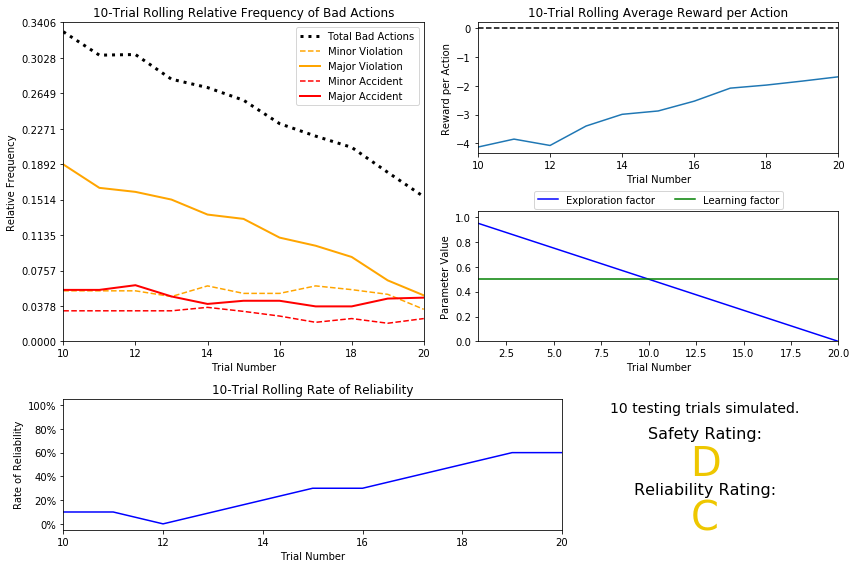

In [55]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- Comparison of Q-learning agent vs. basic driving agent:
    - Safety: the default learning agent gets a higher score than the basic agent (D vs. F).  The number of bad decisions (accidents and violations) all go down by almost half! This suggests that learning has been effective but not complete, and not good enough yet.
    - Reliability: the default learning agent is also much more reliable, scoring a C vs. the basic agent's F, again highlighting the benefits of learning. The agent reaches the destination about 60% of the time, which is double the previous rate of ~30% on average.
    - Parameters: The learning factor stays constant at 0.5 while the epsilon monotonically decreases in linear fashion, which means that the decay formula has been implemented correctly.
    - Reward: The reward is also progreesively getting better for the learning agent vs. the basic agent
- Number of training trials before testing was 20, this makes sense because the number of trials is determined by the difference between epsilon and the tolerance level (testing only begins when epsilon is below the tolerance), divided by the decay step = (1-0.05)/0.05 + 1 = 20 trials. We add 1 because there is a strict inequality and we need one more trial to push epsilon below the tolerance.
- Decay function of epsilon representation is very accurate in the parameters panel. It is clearly linearly decreasing as the number of trials increases. This makes sense because we reduce epsilon by 0.05 after each trial.
- The more training trials run:
    - the less the number of bad actions and
    - the more the average reward
- Safety and reliablility of Q-learning agent and initial driving agent, though numerically different, but the learner has not reached the best quality standards yet.The Q-learner has improved to be better than basic agent but it's still way below the desired standards.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

## Q-learning Improvement Trial-and-Error, Options 1-6

#### Option 1: Low epsilon, Low alpha, Low tolerance (0.1, 0.1,0.05)

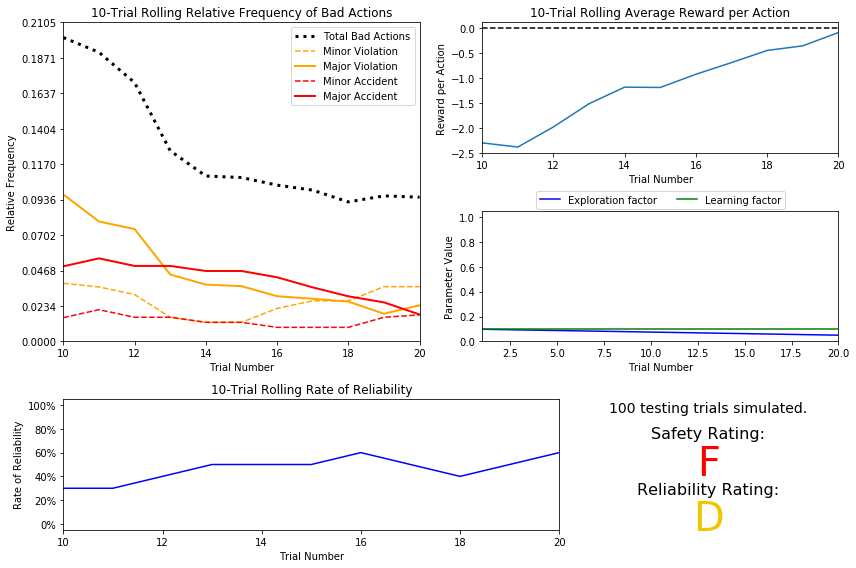

In [31]:
# Load the 'sim_default-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

#### Option 2: Low epsilon, High alpha, High tolerance (0.2, 0.99,0.15)

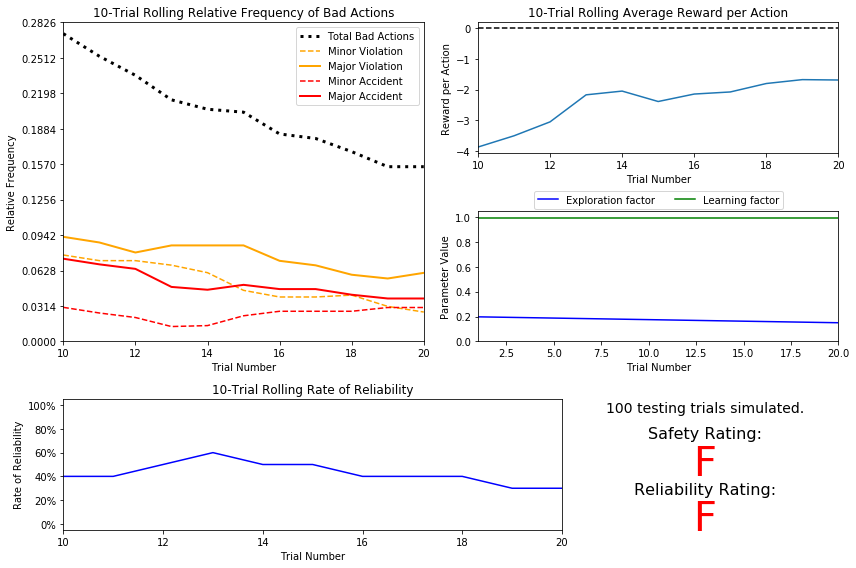

In [32]:
# Load the 'sim_default-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

#### Option 3: Low epsilon, High alpha, Low tolerance (0.2, 0.99,0.05)

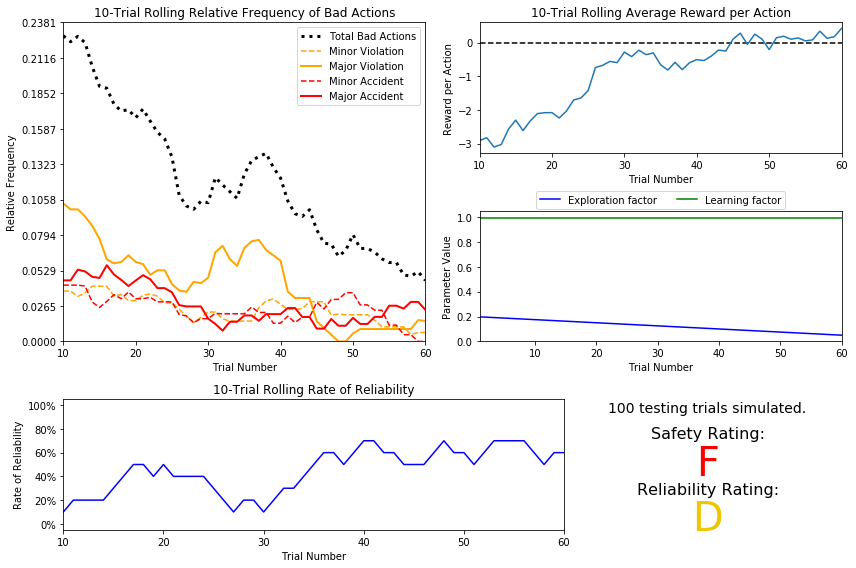

In [33]:
# Load the 'sim_default-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

#### Option 4: High epsilon, Low alpha, Low tolerance (0.99, 0.1,0.05)

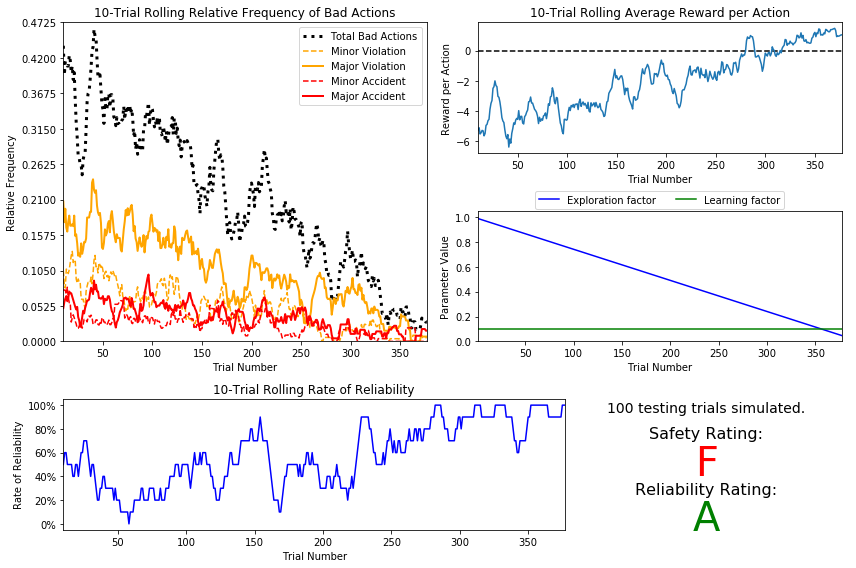

In [34]:
# Load the 'sim_default-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

#### Option 5: High epsilon, High alpha, High tolerance (0.99, 0.99,0.8)

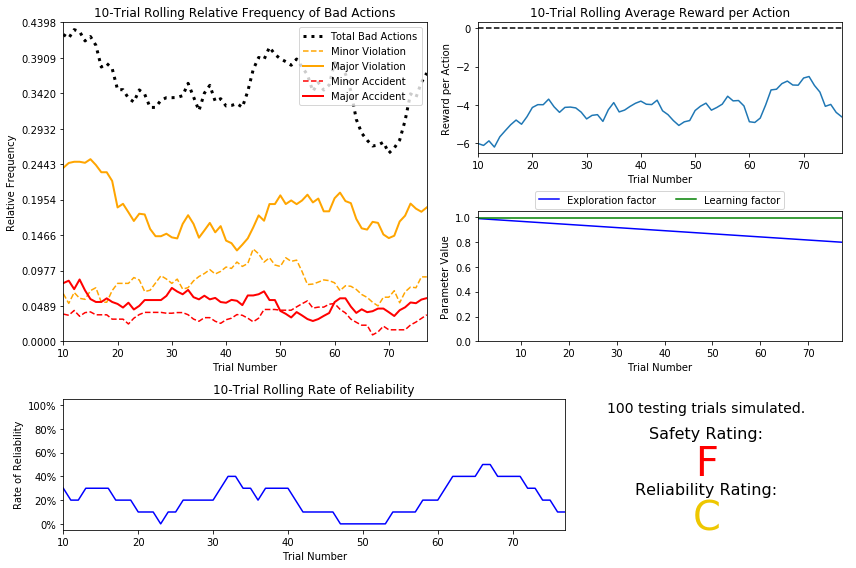

In [35]:
# Load the 'sim_default-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

#### Option 6: High epsilon, High alpha, Low tolerance (0.99, 0.99,0.005)

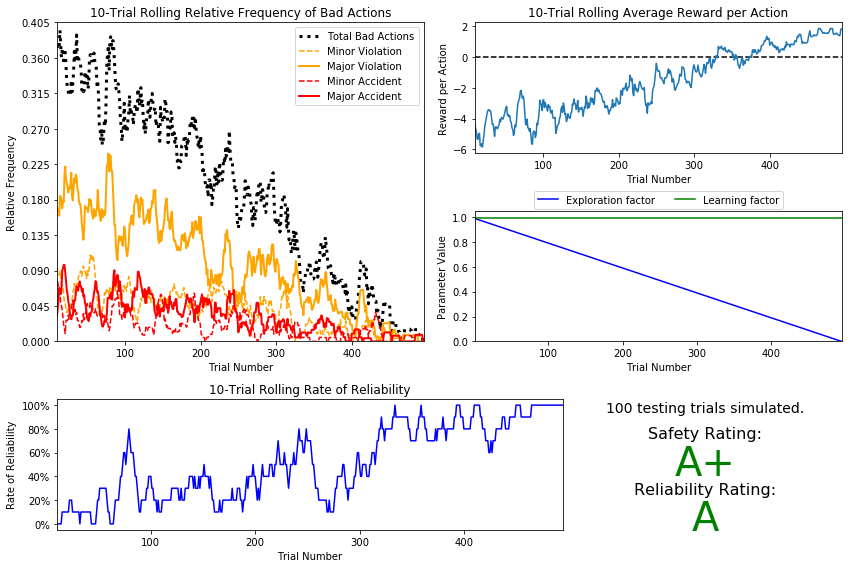

In [53]:
# Load the 'sim_default-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

There are several ways of finding the optimal policy, including but not limited to:
    
    - trial and error with different values of alpha and epsilon
    - trying decaying values for either or both alpha and epsilon (gridsearch techniques)
    - increasing the number of trials which may increase learning
    - selecting the best, most relevant and adequate set of input features

In this exercise, I used a combination of changing alpha and epsilon values while decaying epsilon. I decided to use the simplest, linear decay function (**epsilon = epsilon - 0.002**), with a small decay step of 0.002 to allow for a sufficient number of trials since we are working in the unit space of 0 to 1 for our epsilon variable. Once I fixed the decay function, all that matters now are alpha, epsilon and tolerance which can be tweaned in the following ways:

Option|**epsilon**| **alpha**|**tolerance **|SAFETY| RELIABILITY
---|
Option 1 |low |low |low |F |D 
Option 2| low|high |high |F |F
Option 3|low |high |low |F |D 
Option 4|high |low |low |F |A 
Option 5| high|high |high |F |C
Option 6| high|high |low | A+|A


- The final model, OPTION 6 gave the best results. I used a linear decay function for epsilon, **epsilon = epsilon - 0.002** . This exploration factor decays by a small amount for each trail to allow the agent a lot of time to learn before hitting the tolerance level. The more the agent learns, the safer and more reliable it becomes over time.
- The agent went through ~500 training trials before the agent began testing. This is calculated as **(epsilon-tolerance)/decay_step  = (0.99-0.0005)/0.002 + 1 = 500 **
- I used an epsilon of 0.99 and tolerance of 0.0005 which are further apart i.e. big numerical difference in order to make sure that my agent had enough time to learn. Notice this allows about 500 training trials which is  above the number of combinations in the state space size calculated in previous question (96). I used and an alpha rate of 0.99 in order to transfer the reward as efficiently as possible without discounting - this gives the correct signal to the agent, allowing it to evaluate the most optimal action and the find the best policy.
- There was significant improvement using this Q-learner compared to the previous basic agent/learner. Safety increase from F to A+ while Reliability improved from F to A.
- Yes, the results show that the driving agent has successfully learned the appropriate policy. It is very clear that it started from a place of almost no safety and reliability to have the best score in safety and the second best score on reliability. In terms of Safety, the number of bad decisions incrementally decrease as training trails increase and for realiability, the score is not good up until the agent has done between 300 trials when it starts to get reliability scores above 80% the finally ends up in the A grade levels (>90%)!
- Yes, I am very satisfied with the safety ratings of the Smartcab because it is now 100% safe, which removes any danger from riding it so no lives or property are lost or damaged. As for reliability, I am happy about it, because  it reaches the destination more than 90% of the time. However, it still misses the destination even for that  very small number of times which may lead to unsatisfied customers. I would look more into improving the reliability, probably using more training (including the "destination" feature) however, I will not do this now because it will blow up my state space size by a factor of at least 20. For real world purposes, I would get insurance and a lot of bonus rides to appease customers who end up on the few unreliable rides.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

- Example policy: Imagine a situation where the agent wants to go to the left, the light is red, oncoming traffic wants to go to the left, and the car to the left is not taking any action (or there is no car to the left), ignoring the car to the right. The optimal policy in this case would be to wait i.e. take action = None. As below


Waypoint|"Light"| "Oncoming" | "Left" | Action | Optimal Policy
---|
*left*|*Red*| *left *| *None *| **None **| *Yes*
left|Red| left | None  | forward | No
left|Red| left | None  | Right | No
left|Red| left | None  | Left | No

- Investigating the actual policy learned and implemented by the agent (sim_improved-learning.txt), we find it consistent with the above suggestion to wait and take action = None because the "None" action has the highest reward among all the actions in the file at this particular state. See exact output here 

STATE: **('left', 'red', 'left', None)**
ACTIONS AND REWARDS:
**
 -- forward : -9.06
 -- right : 0.10
 -- None : 1.83
 -- left : -11.23
**
Notice that the None action has the highest reward value of 1.83 in this case, just as expected.

- Looking in the log file, there are no states in which a suboptimal policy was folowed given the training data. The agent executed exactly as I expected it would i.e. according to optimal policy



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
- Smartcab characteristic: the smartcab makes decisions based on the value of the taking an action in the current state. Its inputs are **waypoint, light, left, and oncoming**. The only directional input is waypoint which tells the agent how to proceed towards the destination without actually telling the agent where exactly it is going on the grid square. Thus, the learning is "location-agnostic" i.e. it does not matter where the agent is located or where the destination actually is relative to the agent, it just follows the waypoint provided given the other inputs at that intersection. Thus, it is impossible to propagate back the rewards from an unknown future (agent does not know the exact location of the destination and it also has no idea how much time remains i.e. how many steps to the destination - in my specific implementation). Of course, we could always supply the deadline input but still, the future remains unknown because of "location-agnostic" inputs.

- Environment characteristic: This environment is based on random destinations and the destination changes after every trial. Thus after several rounds of training, the environment would have set all or most of its intersections as the destination which should in effect adjust the average reward at every intersection such that they are equal over time. Before this happens however, the agent would actually begin to learn to prioritize random goals dependent on the random destinations. This will set high Q values for random actions at intersections  such that the agent will value these rewards more and commit traffic violations in the meantime. So this increases traffic violations in the near term but equalizes after many trials since many intersections would have randomly become destinations at some point during learning.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.